In [10]:
import polars as pl
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['font.family'] = 'Hiragino Sans'

In [3]:
# Read the CSV file into a Polars DataFrame
csv_file_path = 'double_dose_data.csv'
df_polars = pl.read_csv(csv_file_path)

# Display the DataFrame (in Jupyter, the last expression in a cell is often displayed)
df_polars

時間 (h),18 mg AVG,18 mg SD,36 mg AVG,36 mg SD,54 mg AVG,54 mg SD
i64,f64,f64,f64,f64,f64,f64
0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.3,0.8,3.8,1.8,5.6,2.4
2,1.8,0.7,4.1,1.9,6.3,2.6
3,2.2,0.9,5.0,2.4,7.4,3.0
4,2.0,0.7,4.0,1.5,6.0,2.3
…,…,…,…,…,…,…
10,3.4,1.1,6.0,2.4,8.6,3.2
12,2.8,1.0,5.6,2.1,8.1,2.9
16,1.5,0.6,2.8,1.0,4.1,1.4


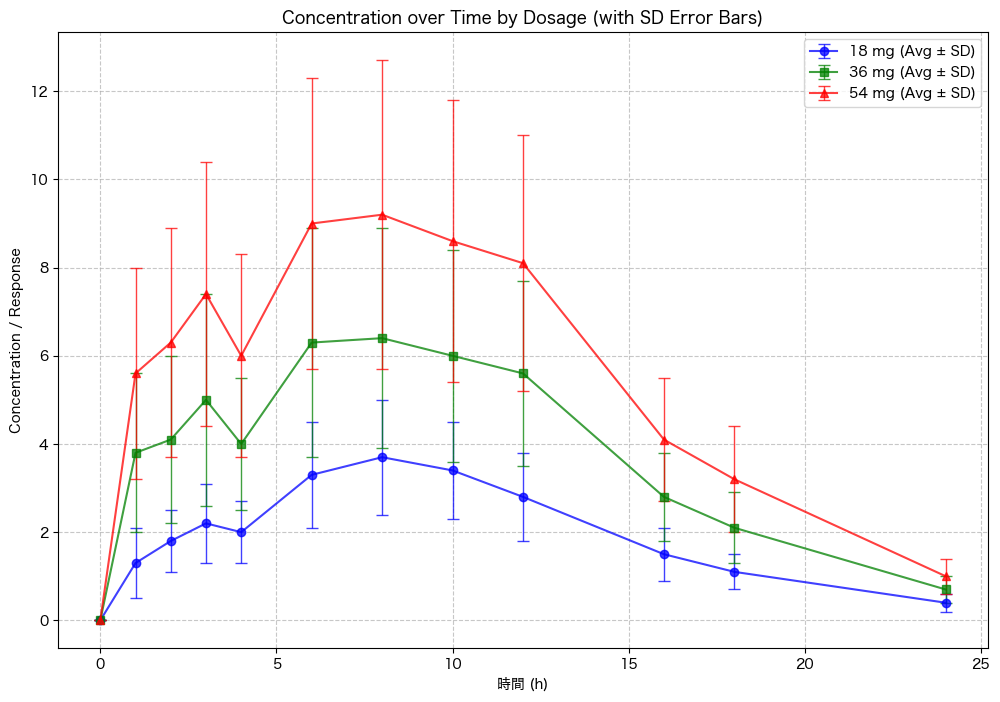

In [12]:
import numpy as np # For NaN handling if any column is not purely numeric
import matplotlib.pyplot as plt # Ensure it's imported

# Assuming df_polars is your Polars DataFrame loaded in a previous cell
# If not, and it's a Pandas DataFrame, the .to_numpy() calls will still work.

time_h = df_polars['時間 (h)'].to_numpy()

dosages = ['18 mg', '36 mg', '54 mg']
colors = ['blue', 'green', 'red']
markers = ['o', 's', '^'] # Different markers for each dosage

plt.figure(figsize=(12, 8)) # Slightly adjusted size

for i, dosage in enumerate(dosages):
    avg_col = f"{dosage} AVG"
    sd_col = f"{dosage} SD"

    avg_values = df_polars[avg_col].to_numpy()
    sd_values = df_polars[sd_col].to_numpy()

    # Plot average line with markers and error bars for SD
    # fmt='-o' creates a line with markers.
    # ecolor controls the color of the error bars.
    # elinewidth controls the thickness of the error bar lines.
    # capsize adds small caps to the end of the error bars.
    plt.errorbar(time_h,
                 avg_values,
                 yerr=sd_values,
                 label=f'{dosage} (Avg ± SD)',
                 fmt=f'-{markers[i]}',  # Line with a unique marker for each dosage
                 color=colors[i],
                 ecolor=colors[i],  # Error bars same color as the line
                 elinewidth=1,
                 capsize=4,        # Size of the caps on error bars
                 alpha=0.75,       # Slight transparency for error bars if needed
                 capthick=1)       # Thickness of the caps

plt.xlabel('時間 (h)')
plt.ylabel('Concentration / Response') # You might want a more specific Y-axis label
plt.title('Concentration over Time by Dosage (with SD Error Bars)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [17]:
# Assuming df_polars is your Polars DataFrame from the previous steps
# and contains '18 mg AVG' and '18 mg SD' columns.

# Calculate the new '27 mg AVG' column
df_polars = df_polars.with_columns(
    (pl.col('18 mg AVG') * 1.5).alias('27 mg AVG')
)

# Calculate the new '27 mg SD' column
df_polars = df_polars.with_columns(
    (pl.col('18 mg SD') * 1.5).alias('27 mg SD')
)

# Display the DataFrame with the new columns to verify
# You can display the whole DataFrame or just the relevant columns / head
print("DataFrame with new '27 mg' columns:")
print(df_polars)

# You can also check the specific columns
print("\nRelevant columns including new 27 mg data:")
print(df_polars.select(['時間 (h)', '18 mg AVG', '18 mg SD', '27 mg AVG', '27 mg SD']))

DataFrame with new '27 mg' columns:
shape: (12, 9)
┌──────────┬───────────┬──────────┬───────────┬───┬───────────┬──────────┬───────────┬──────────┐
│ 時間 (h) ┆ 18 mg AVG ┆ 18 mg SD ┆ 36 mg AVG ┆ … ┆ 54 mg AVG ┆ 54 mg SD ┆ 27 mg AVG ┆ 27 mg SD │
│ ---      ┆ ---       ┆ ---      ┆ ---       ┆   ┆ ---       ┆ ---      ┆ ---       ┆ ---      │
│ i64      ┆ f64       ┆ f64      ┆ f64       ┆   ┆ f64       ┆ f64      ┆ f64       ┆ f64      │
╞══════════╪═══════════╪══════════╪═══════════╪═══╪═══════════╪══════════╪═══════════╪══════════╡
│ 0        ┆ 0.0       ┆ 0.0      ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0      ┆ 0.0       ┆ 0.0      │
│ 1        ┆ 1.3       ┆ 0.8      ┆ 3.8       ┆ … ┆ 5.6       ┆ 2.4      ┆ 1.95      ┆ 1.2      │
│ 2        ┆ 1.8       ┆ 0.7      ┆ 4.1       ┆ … ┆ 6.3       ┆ 2.6      ┆ 2.7       ┆ 1.05     │
│ 3        ┆ 2.2       ┆ 0.9      ┆ 5.0       ┆ … ┆ 7.4       ┆ 3.0      ┆ 3.3       ┆ 1.35     │
│ 4        ┆ 2.0       ┆ 0.7      ┆ 4.0       ┆ … ┆ 6.0       ┆ 2.3  

Simulated data for Case 1 (36mg at t=0, then 27mg at t=2h):
shape: (12, 9)
┌──────────┬─────────────┬─────────────┬────────────┬───┬─────────┬─────────┬─────────┬────────────┐
│ 時間 (h) ┆ total_conc_ ┆ conc_36mg_t ┆ conc_27mg_ ┆ … ┆ c1_27mg ┆ t2_27mg ┆ c2_27mg ┆ lookup_tim │
│ ---      ┆ case1       ┆ 0           ┆ effective  ┆   ┆ ---     ┆ ---     ┆ ---     ┆ e_for_27mg │
│ i64      ┆ ---         ┆ ---         ┆ ---        ┆   ┆ f64     ┆ i64     ┆ f64     ┆ _dose      │
│          ┆ f64         ┆ f64         ┆ f64        ┆   ┆         ┆         ┆         ┆ ---        │
│          ┆             ┆             ┆            ┆   ┆         ┆         ┆         ┆ i64        │
╞══════════╪═════════════╪═════════════╪════════════╪═══╪═════════╪═════════╪═════════╪════════════╡
│ 0        ┆ 0.0         ┆ 0.0         ┆ 0.0        ┆ … ┆ null    ┆ 0       ┆ 0.0     ┆ -2         │
│ 1        ┆ 3.8         ┆ 3.8         ┆ 0.0        ┆ … ┆ null    ┆ 0       ┆ 0.0     ┆ -1         │
│ 2        ┆ 4.1  

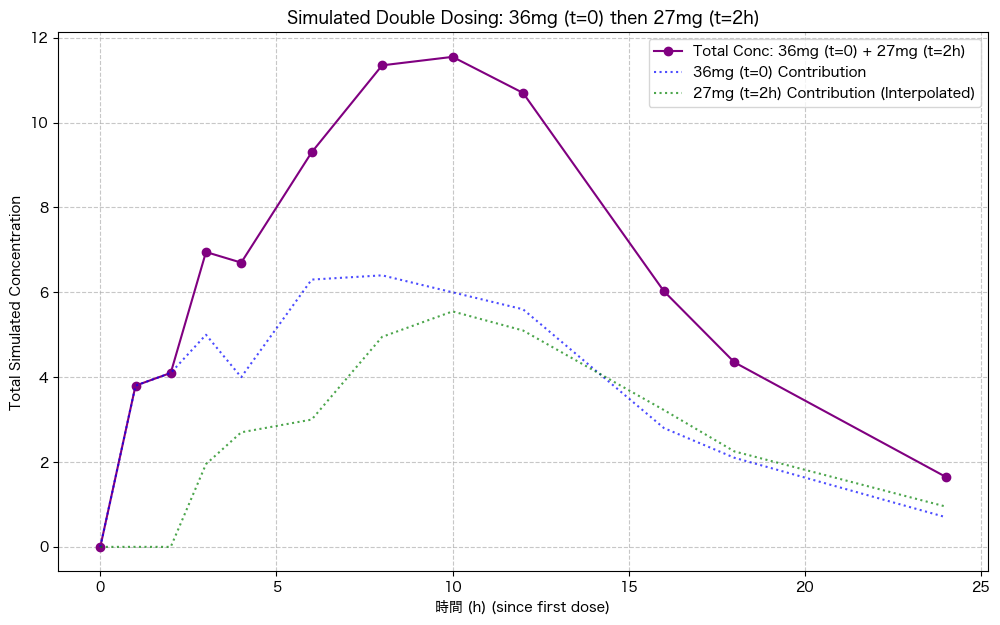

In [18]:
# Ensure df_polars exists from previous steps
# print("Columns in df_polars:", df_polars.columns)

# Case 1: 36mg at t=0, then 27mg at t=2hr

df_profiles_for_sim = df_polars.select([
    pl.col('時間 (h)'),
    pl.col('36 mg AVG'),
    pl.col('27 mg AVG')
]).sort('時間 (h)')

df_sim_case1 = df_profiles_for_sim.select([
    pl.col('時間 (h)'),
    pl.col('36 mg AVG').alias('conc_36mg_t0')
])

# This is the lookup table for the 27mg dose profile.
# It contains the time since the 27mg dose was taken and its corresponding concentration.
df_27mg_profile_lookup = df_profiles_for_sim.select([
    pl.col('時間 (h)').alias('time_key_27mg'), # Renaming for clarity in lookup table
    pl.col('27 mg AVG').alias('conc_key_27mg') # Renaming for clarity in lookup table
]).sort('time_key_27mg') # Crucial: Must be sorted for asof_join

# This is the time relative to the 27mg dose administration.
# (e.g., if main time '時間 (h)' is 3, and 27mg dose was at t=2, then this is 1)
df_sim_case1 = df_sim_case1.with_columns(
    (pl.col('時間 (h)') - 2).alias('lookup_time_for_27mg_dose')
)

# --- Corrected Linear Interpolation for 27mg dose ---

# 1. Backward join to find the value at or before the lookup time
#    The columns from df_27mg_profile_lookup will be 'time_key_27mg' and 'conc_key_27mg'
df_sim_case1 = df_sim_case1.join_asof(
    df_27mg_profile_lookup,
    left_on='lookup_time_for_27mg_dose',
    right_on='time_key_27mg', # Join on the renamed time key from the lookup table
    strategy='backward'
)
# After this join, df_sim_case1 will have 'time_key_27mg' and 'conc_key_27mg'
# from the backward match. We rename them to t1 and c1.
df_sim_case1 = df_sim_case1.rename({
    "time_key_27mg": "t1_27mg",    # This was the 'time_key_27mg' from the right table
    "conc_key_27mg": "c1_27mg"     # This was the 'conc_key_27mg' from the right table
})


# 2. Forward join to find the value at or after the lookup time
#    Need to drop the t1_27mg, c1_27mg before the next join to avoid actual suffixing, or be careful with names.
#    A cleaner way is to select necessary columns before join or ensure unique names in the lookup table for forward join.
#    For simplicity here, let's re-create the lookup table with slightly different names for the forward join
#    or be explicit. Let's assume Polars handles the join keys appropriately and we just rename the new columns.

# To avoid confusion, let's drop the columns from the previous join if they weren't renamed yet,
# or ensure the next join's suffixing is predictable or columns are unique.
# The current rename strategy should work if Polars doesn't carry over the old join key name confusingly.
# Let's test. The schema error showed the names after the first join BEFORE rename.

df_sim_case1 = df_sim_case1.join_asof(
    df_27mg_profile_lookup, # Using the same lookup table
    left_on='lookup_time_for_27mg_dose',
    right_on='time_key_27mg', # Join on the renamed time key
    strategy='forward'
)
# After this join, new columns 'time_key_27mg' and 'conc_key_27mg' are added (or existing ones updated if not careful)
# from the forward match. We rename these to t2 and c2.
df_sim_case1 = df_sim_case1.rename({
    "time_key_27mg": "t2_27mg",    # This is the NEW 'time_key_27mg' from the forward join
    "conc_key_27mg": "c2_27mg"     # This is the NEW 'conc_key_27mg' from the forward join
})

# 3. Calculate interpolated concentration
df_sim_case1 = df_sim_case1.with_columns(
    pl.when(pl.col('lookup_time_for_27mg_dose') < 0)
    .then(0.0)
    .when(pl.col('t1_27mg').is_null() | pl.col('t2_27mg').is_null())
    .then(pl.coalesce(pl.col('c1_27mg'), pl.col('c2_27mg'), 0.0))
    .when(pl.col('t1_27mg') == pl.col('t2_27mg'))
    .then(pl.col('c1_27mg'))
    .when((pl.col('t2_27mg') - pl.col('t1_27mg')) == 0) # Explicitly handle division by zero if t1=t2
    .then(pl.col('c1_27mg')) # or c2_27mg, they'd be the same if t1=t2
    .otherwise(
        pl.col('c1_27mg') +
        (pl.col('lookup_time_for_27mg_dose') - pl.col('t1_27mg')) *
        (pl.col('c2_27mg') - pl.col('c1_27mg')) /
        (pl.col('t2_27mg') - pl.col('t1_27mg'))
    )
    .fill_null(0.0)
    .alias('conc_27mg_interpolated')
)

df_sim_case1 = df_sim_case1.with_columns(
    pl.when(pl.col('lookup_time_for_27mg_dose') < 0)
    .then(0.0)
    .otherwise(pl.col('conc_27mg_interpolated'))
    .alias('conc_27mg_effective')
)

df_sim_case1 = df_sim_case1.with_columns(
    (pl.col('conc_36mg_t0') + pl.col('conc_27mg_effective')).alias('total_conc_case1')
)

df_sim_case1_to_plot = df_sim_case1.select(['時間 (h)', 'total_conc_case1', 'conc_36mg_t0', 'conc_27mg_effective', 't1_27mg', 'c1_27mg', 't2_27mg', 'c2_27mg', 'lookup_time_for_27mg_dose'])
print("Simulated data for Case 1 (36mg at t=0, then 27mg at t=2h):")
print(df_sim_case1_to_plot) # Print more columns for debugging

plt.figure(figsize=(12, 7))
plt.plot(df_sim_case1_to_plot['時間 (h)'],
         df_sim_case1_to_plot['total_conc_case1'],
         label='Total Conc: 36mg (t=0) + 27mg (t=2h)',
         color='purple',
         marker='o',
         linestyle='-')

# Optional: Plot individual contributions for verification/understanding
plt.plot(df_sim_case1_to_plot['時間 (h)'], df_sim_case1_to_plot['conc_36mg_t0'], label='36mg (t=0) Contribution', color='blue', linestyle=':', alpha=0.7)
plt.plot(df_sim_case1_to_plot['時間 (h)'], df_sim_case1_to_plot['conc_27mg_effective'], label='27mg (t=2h) Contribution (Interpolated)', color='green', linestyle=':', alpha=0.7)

plt.xlabel('時間 (h) (since first dose)')
plt.ylabel('Total Simulated Concentration')
plt.title('Simulated Double Dosing: 36mg (t=0) then 27mg (t=2h)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Simulated data for Case 1 (36mg at t=0, then 27mg at t=2h) with SD:
shape: (12, 3)
┌──────────┬──────────────────────┬─────────────────────┐
│ 時間 (h) ┆ total_conc_avg_case1 ┆ total_conc_sd_case1 │
│ ---      ┆ ---                  ┆ ---                 │
│ i64      ┆ f64                  ┆ f64                 │
╞══════════╪══════════════════════╪═════════════════════╡
│ 0        ┆ 0.0                  ┆ 0.0                 │
│ 1        ┆ 3.8                  ┆ 1.8                 │
│ 2        ┆ 4.1                  ┆ 1.9                 │
│ 3        ┆ 6.95                 ┆ 2.683282            │
│ 4        ┆ 6.7                  ┆ 1.830983            │
│ …        ┆ …                    ┆ …                   │
│ 10       ┆ 11.55                ┆ 3.092329            │
│ 12       ┆ 10.7                 ┆ 2.670674            │
│ 16       ┆ 6.025                ┆ 1.56205             │
│ 18       ┆ 4.35                 ┆ 1.204159            │
│ 24       ┆ 1.65                 ┆ 0.5          

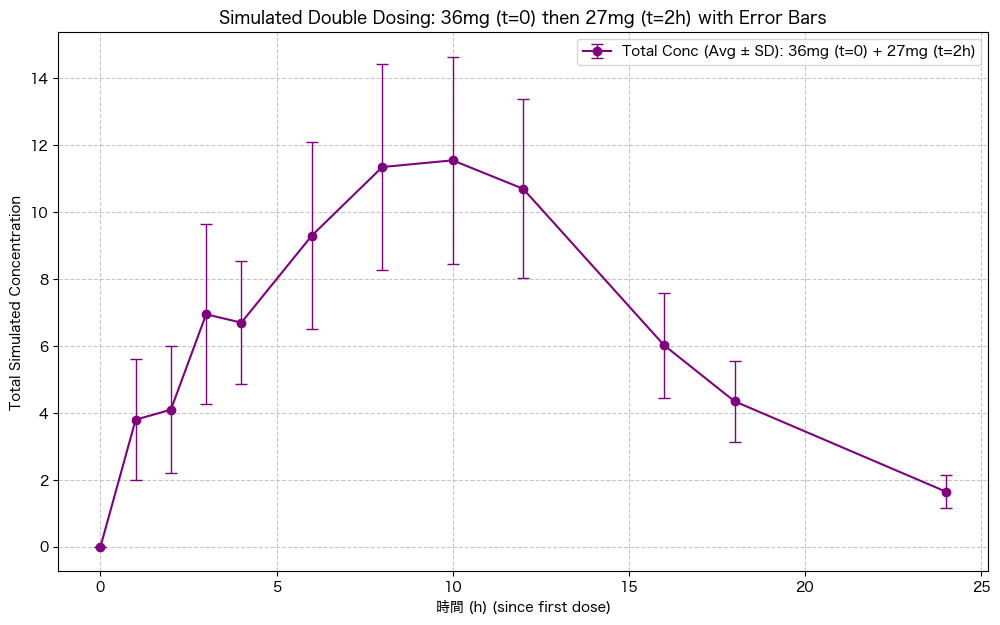

In [19]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np # For sqrt

# Ensure df_polars exists from previous steps and contains AVG and SD for 36mg and 27mg.
# print("Columns in df_polars:", df_polars.columns)

# Case 1: 36mg at t=0, then 27mg at t=2hr

df_profiles_for_sim = df_polars.select([
    pl.col('時間 (h)'),
    pl.col('36 mg AVG'),
    pl.col('36 mg SD'), # Added SD for 36mg dose
    pl.col('27 mg AVG'),
    pl.col('27 mg SD')  # Added SD for 27mg dose
]).sort('時間 (h)')

# This will be our main simulation DataFrame
df_sim_case1 = df_profiles_for_sim.select([
    pl.col('時間 (h)'),
    pl.col('36 mg AVG').alias('conc_36mg_t0'),
    pl.col('36 mg SD').alias('sd_36mg_t0') # SD for the first dose
])

# Prepare the profile for the second dose (27mg) including SD for lookup.
df_27mg_profile_lookup = df_profiles_for_sim.select([
    pl.col('時間 (h)').alias('time_key_27mg'),
    pl.col('27 mg AVG').alias('conc_key_27mg'),
    pl.col('27 mg SD').alias('sd_key_27mg') # SD for 27mg dose in lookup
]).sort('time_key_27mg')

# Time relative to 27mg dose administration
df_sim_case1 = df_sim_case1.with_columns(
    (pl.col('時間 (h)') - 2).alias('lookup_time_for_27mg_dose')
)

# --- Linear Interpolation for 27mg dose (AVG and SD) ---

# 1. Backward join for AVG and SD
df_sim_case1 = df_sim_case1.join_asof(
    df_27mg_profile_lookup,
    left_on='lookup_time_for_27mg_dose',
    right_on='time_key_27mg',
    strategy='backward'
)
df_sim_case1 = df_sim_case1.rename({
    "time_key_27mg": "t1_27mg",
    "conc_key_27mg": "c1_avg_27mg", # AVG at t1
    "sd_key_27mg": "s1_sd_27mg"    # SD at t1
})

# 2. Forward join for AVG and SD
df_sim_case1 = df_sim_case1.join_asof(
    df_27mg_profile_lookup,
    left_on='lookup_time_for_27mg_dose',
    right_on='time_key_27mg',
    strategy='forward'
)
df_sim_case1 = df_sim_case1.rename({
    "time_key_27mg": "t2_27mg",
    "conc_key_27mg": "c2_avg_27mg", # AVG at t2
    "sd_key_27mg": "s2_sd_27mg"    # SD at t2
})

# 3. Calculate interpolated AVG for 27mg dose
df_sim_case1 = df_sim_case1.with_columns(
    pl.when(pl.col('lookup_time_for_27mg_dose') < 0)
    .then(0.0)
    .when(pl.col('t1_27mg').is_null() | pl.col('t2_27mg').is_null())
    .then(pl.coalesce(pl.col('c1_avg_27mg'), pl.col('c2_avg_27mg'), 0.0))
    .when(pl.col('t1_27mg') == pl.col('t2_27mg'))
    .then(pl.col('c1_avg_27mg'))
    .when((pl.col('t2_27mg') - pl.col('t1_27mg')) == 0)
    .then(pl.col('c1_avg_27mg'))
    .otherwise(
        pl.col('c1_avg_27mg') +
        (pl.col('lookup_time_for_27mg_dose') - pl.col('t1_27mg')) *
        (pl.col('c2_avg_27mg') - pl.col('c1_avg_27mg')) /
        (pl.col('t2_27mg') - pl.col('t1_27mg'))
    )
    .fill_null(0.0)
    .alias('conc_27mg_avg_interpolated')
)

# 4. Calculate interpolated SD for 27mg dose (using same interpolation logic)
df_sim_case1 = df_sim_case1.with_columns(
    pl.when(pl.col('lookup_time_for_27mg_dose') < 0)
    .then(0.0) # SD is 0 if dose is not active
    .when(pl.col('t1_27mg').is_null() | pl.col('t2_27mg').is_null()) # Outside range
    .then(pl.coalesce(pl.col('s1_sd_27mg'), pl.col('s2_sd_27mg'), 0.0))
    .when(pl.col('t1_27mg') == pl.col('t2_27mg')) # Exact match
    .then(pl.col('s1_sd_27mg'))
    .when((pl.col('t2_27mg') - pl.col('t1_27mg')) == 0) # Denominator is zero
    .then(pl.col('s1_sd_27mg'))
    .otherwise( # Interpolate SD
        pl.col('s1_sd_27mg') +
        (pl.col('lookup_time_for_27mg_dose') - pl.col('t1_27mg')) *
        (pl.col('s2_sd_27mg') - pl.col('s1_sd_27mg')) /
        (pl.col('t2_27mg') - pl.col('t1_27mg'))
    )
    .fill_null(0.0) # SD is 0 if it cannot be determined
    .alias('conc_27mg_sd_interpolated')
)

# Effective AVG and SD for 27mg dose
df_sim_case1 = df_sim_case1.with_columns([
    pl.when(pl.col('lookup_time_for_27mg_dose') < 0)
    .then(0.0)
    .otherwise(pl.col('conc_27mg_avg_interpolated'))
    .alias('conc_27mg_avg_effective'),

    pl.when(pl.col('lookup_time_for_27mg_dose') < 0)
    .then(0.0)
    .otherwise(pl.col('conc_27mg_sd_interpolated'))
    .alias('conc_27mg_sd_effective')
])

# Calculate total AVG concentration and total SD
df_sim_case1 = df_sim_case1.with_columns([
    (pl.col('conc_36mg_t0') + pl.col('conc_27mg_avg_effective')).alias('total_conc_avg_case1'),
    # SD_total = sqrt(SD1^2 + SD2^2)
    # Ensure SDs are not negative before squaring, though they shouldn't be.
    ( (pl.col('sd_36mg_t0').pow(2)) + (pl.col('conc_27mg_sd_effective').pow(2)) ).sqrt().alias('total_conc_sd_case1')
])


# Select final columns for plotting and display
df_sim_case1_to_plot = df_sim_case1.select([
    '時間 (h)',
    'total_conc_avg_case1',
    'total_conc_sd_case1',
    # 'conc_36mg_t0', 'sd_36mg_t0', # Optional for debugging
    # 'conc_27mg_avg_effective', 'conc_27mg_sd_effective' # Optional for debugging
])
print("Simulated data for Case 1 (36mg at t=0, then 27mg at t=2h) with SD:")
print(df_sim_case1_to_plot)

# Plotting the result with error bars
plt.figure(figsize=(12, 7))
plt.errorbar(df_sim_case1_to_plot['時間 (h)'],
             df_sim_case1_to_plot['total_conc_avg_case1'],
             yerr=df_sim_case1_to_plot['total_conc_sd_case1'],
             label='Total Conc (Avg ± SD): 36mg (t=0) + 27mg (t=2h)',
             fmt='-o', # Line with markers
             color='purple',
             ecolor='purple', # Error bar color
             elinewidth=1,
             capsize=4,
             capthick=1)

plt.xlabel('時間 (h) (since first dose)')
plt.ylabel('Total Simulated Concentration')
plt.title('Simulated Double Dosing: 36mg (t=0) then 27mg (t=2h) with Error Bars')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [20]:
def plot_double_dose_simulation(
    df_source: pl.DataFrame,
    dose1_amount_str: str,
    dose2_amount_str: str,
    delay_hours: float,
    avg_suffix: str = "AVG",
    sd_suffix: str = "SD",
    time_column_name: str = '時間 (h)'
):
    """
    Simulates and plots a double dosing pattern with error bars.

    Args:
        df_source (pl.DataFrame): DataFrame containing individual dosage profiles (AVG and SD).
        dose1_amount_str (str): String for the first dose amount (e.g., "36 mg").
        dose2_amount_str (str): String for the second dose amount (e.g., "27 mg").
        delay_hours (float): Delay of the second dose in hours (e.g., 2.0).
        avg_suffix (str, optional): Suffix for average columns. Defaults to "AVG".
        sd_suffix (str, optional): Suffix for standard deviation columns. Defaults to "SD".
        time_column_name (str, optional): Name of the time column. Defaults to '時間 (h)'.
    """

    # Construct column names based on inputs
    dose1_avg_col = f"{dose1_amount_str} {avg_suffix}"
    dose1_sd_col = f"{dose1_amount_str} {sd_suffix}"
    dose2_avg_col = f"{dose2_amount_str} {avg_suffix}"
    dose2_sd_col = f"{dose2_amount_str} {sd_suffix}"

    # --- Input Validation (Basic) ---
    required_cols = [time_column_name, dose1_avg_col, dose1_sd_col, dose2_avg_col, dose2_sd_col]
    for col in required_cols:
        if col not in df_source.columns:
            print(f"Error: Column '{col}' not found in the source DataFrame.")
            return

    # --- Data Preparation ---
    df_profiles_for_sim = df_source.select(required_cols).sort(time_column_name)

    df_sim = df_profiles_for_sim.select([
        pl.col(time_column_name),
        pl.col(dose1_avg_col).alias('conc_dose1_t0'),
        pl.col(dose1_sd_col).alias('sd_dose1_t0')
    ])

    df_dose2_profile_lookup = df_profiles_for_sim.select([
        pl.col(time_column_name).alias('time_key_dose2'),
        pl.col(dose2_avg_col).alias('conc_key_dose2_avg'),
        pl.col(dose2_sd_col).alias('conc_key_dose2_sd')
    ]).sort('time_key_dose2')

    df_sim = df_sim.with_columns(
        (pl.col(time_column_name) - delay_hours).alias('lookup_time_for_dose2')
    )

    # --- Linear Interpolation for Second Dose (AVG and SD) ---
    # 1. Backward join
    df_sim = df_sim.join_asof(
        df_dose2_profile_lookup,
        left_on='lookup_time_for_dose2',
        right_on='time_key_dose2',
        strategy='backward'
    )
    df_sim = df_sim.rename({
        "time_key_dose2": "t1_dose2",
        "conc_key_dose2_avg": "c1_avg_dose2",
        "conc_key_dose2_sd": "s1_sd_dose2"
    })

    # 2. Forward join
    df_sim = df_sim.join_asof(
        df_dose2_profile_lookup,
        left_on='lookup_time_for_dose2',
        right_on='time_key_dose2',
        strategy='forward'
    )
    df_sim = df_sim.rename({
        "time_key_dose2": "t2_dose2",
        "conc_key_dose2_avg": "c2_avg_dose2",
        "conc_key_dose2_sd": "s2_sd_dose2"
    })

    # Interpolation common conditions
    condition_before_dose2_active = pl.col('lookup_time_for_dose2') < 0
    condition_outside_interpolation_range = pl.col('t1_dose2').is_null() | pl.col('t2_dose2').is_null()
    condition_exact_match_or_flat = pl.col('t1_dose2') == pl.col('t2_dose2')
    condition_interpolation_denominator_zero = (pl.col('t2_dose2') - pl.col('t1_dose2')) == 0

    # 3. Interpolate AVG for dose2
    df_sim = df_sim.with_columns(
        pl.when(condition_before_dose2_active).then(0.0)
        .when(condition_outside_interpolation_range).then(pl.coalesce(pl.col('c1_avg_dose2'), pl.col('c2_avg_dose2'), 0.0))
        .when(condition_exact_match_or_flat).then(pl.col('c1_avg_dose2'))
        .when(condition_interpolation_denominator_zero).then(pl.col('c1_avg_dose2')) # Avoid division by zero
        .otherwise(
            pl.col('c1_avg_dose2') +
            (pl.col('lookup_time_for_dose2') - pl.col('t1_dose2')) *
            (pl.col('c2_avg_dose2') - pl.col('c1_avg_dose2')) /
            (pl.col('t2_dose2') - pl.col('t1_dose2'))
        )
        .fill_null(0.0)
        .alias('conc_dose2_avg_interpolated')
    )

    # 4. Interpolate SD for dose2
    df_sim = df_sim.with_columns(
        pl.when(condition_before_dose2_active).then(0.0)
        .when(condition_outside_interpolation_range).then(pl.coalesce(pl.col('s1_sd_dose2'), pl.col('s2_sd_dose2'), 0.0))
        .when(condition_exact_match_or_flat).then(pl.col('s1_sd_dose2'))
        .when(condition_interpolation_denominator_zero).then(pl.col('s1_sd_dose2')) # Avoid division by zero
        .otherwise(
            pl.col('s1_sd_dose2') +
            (pl.col('lookup_time_for_dose2') - pl.col('t1_dose2')) *
            (pl.col('s2_sd_dose2') - pl.col('s1_sd_dose2')) /
            (pl.col('t2_dose2') - pl.col('t1_dose2'))
        )
        .fill_null(0.0)
        .alias('conc_dose2_sd_interpolated')
    )

    # Effective AVG and SD for dose2
    df_sim = df_sim.with_columns([
        pl.when(condition_before_dose2_active).then(0.0)
        .otherwise(pl.col('conc_dose2_avg_interpolated'))
        .alias('conc_dose2_avg_effective'),

        pl.when(condition_before_dose2_active).then(0.0)
        .otherwise(pl.col('conc_dose2_sd_interpolated'))
        .alias('conc_dose2_sd_effective')
    ])

    # --- Total AVG and SD Calculation ---
    df_sim = df_sim.with_columns([
        (pl.col('conc_dose1_t0') + pl.col('conc_dose2_avg_effective')).alias('total_conc_avg'),
        ( (pl.col('sd_dose1_t0').pow(2)) + (pl.col('conc_dose2_sd_effective').pow(2)) ).sqrt().alias('total_conc_sd')
    ])

    # --- Plotting ---
    df_to_plot = df_sim.select([time_column_name, 'total_conc_avg', 'total_conc_sd'])

    # print("Data for plotting:") # For debugging
    # print(df_to_plot)

    plt.figure(figsize=(12, 7))
    plt.errorbar(df_to_plot[time_column_name],
                 df_to_plot['total_conc_avg'],
                 yerr=df_to_plot['total_conc_sd'],
                 label=f'Total: {dose1_amount_str} (t=0) + {dose2_amount_str} (t={delay_hours}h)',
                 fmt='-o',
                 color='purple', # You can parameterize color if needed
                 ecolor='purple',
                 elinewidth=1,
                 capsize=4,
                 capthick=1)

    plt.xlabel(f'{time_column_name} (since first dose)')
    plt.ylabel('Total Simulated Concentration (Avg ± SD)')
    plt.title(f'Simulated Double Dosing: {dose1_amount_str} then {dose2_amount_str} after {delay_hours}h')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# --- Example Usage (you would call this in another cell) ---
# Make sure df_polars is defined and has the necessary columns, including '27 mg AVG' and '27 mg SD'
# For example, if df_polars is your main DataFrame:

# plot_double_dose_simulation(
#     df_source=df_polars,
#     dose1_amount_str="36 mg",
#     dose2_amount_str="27 mg",
#     delay_hours=2.0
# )

# plot_double_dose_simulation(
#     df_source=df_polars,
#     dose1_amount_str="18 mg",
#     dose2_amount_str="18 mg",
#     delay_hours=4.0,
#     avg_suffix="AV", # Example of using optional arg
#     sd_suffix="SDEV"  # Example of using optional arg
# )

In [21]:
plot_double_dose_simulation(df_polars, "36 mg", "36 mg", 0.0)

DuplicateError: the name '36 mg AVG' is duplicate

It's possible that multiple expressions are returning the same default column name. If this is the case, try renaming the columns with `.alias("new_name")` to avoid duplicate column names.

In [24]:
def plot_double_dose_simulation(
    df_source: pl.DataFrame,
    dose1_amount_str: str,
    dose2_amount_str: str,
    delay_hours: float,
    avg_suffix: str = "AVG",
    sd_suffix: str = "SD",
    time_column_name: str = '時間 (h)'
):
    """
    Simulates and plots a double dosing pattern with error bars.
    Args are the same as before.
    """

    dose1_avg_col = f"{dose1_amount_str} {avg_suffix}"
    dose1_sd_col = f"{dose1_amount_str} {sd_suffix}"
    dose2_avg_col = f"{dose2_amount_str} {avg_suffix}"
    dose2_sd_col = f"{dose2_amount_str} {sd_suffix}"

    required_cols_set = {time_column_name, dose1_avg_col, dose1_sd_col, dose2_avg_col, dose2_sd_col}
    for col_name in required_cols_set:
        if col_name not in df_source.columns:
            print(f"Error: Column '{col_name}' not found in the source DataFrame.")
            return

    # Ensure time column is float for arithmetic and sorting
    df_profiles_for_sim = df_source.with_columns(
        pl.col(time_column_name).cast(pl.Float64)
    ).select(list(required_cols_set)).sort(time_column_name)


    df_sim = df_profiles_for_sim.select([
        pl.col(time_column_name),
        pl.col(dose1_avg_col).alias('conc_dose1_t0'),
        pl.col(dose1_sd_col).alias('sd_dose1_t0')
    ])

    df_dose2_profile_lookup = df_profiles_for_sim.select([
        pl.col(time_column_name).alias('time_key_dose2'), # Already float from df_profiles_for_sim
        pl.col(dose2_avg_col).alias('conc_key_dose2_avg'),
        pl.col(dose2_sd_col).alias('conc_key_dose2_sd')
    ]).sort('time_key_dose2') # This sort is crucial

    df_sim = df_sim.with_columns(
        (pl.col(time_column_name) - float(delay_hours)).alias('lookup_time_for_dose2')
    )

    # --- Linear Interpolation for Second Dose (AVG and SD) ---

    # 1. Backward join
    df_lookup_bwd = df_dose2_profile_lookup.select([
        pl.col('time_key_dose2').alias('join_key_bwd'),
        pl.col('time_key_dose2').alias('t1_dose2'),
        pl.col('conc_key_dose2_avg').alias('c1_avg_dose2'),
        pl.col('conc_key_dose2_sd').alias('s1_sd_dose2')
    ]).sort('join_key_bwd') # Explicitly sort, though should be inherited

    df_sim = df_sim.join_asof(
        df_lookup_bwd,
        left_on='lookup_time_for_dose2',
        right_on='join_key_bwd',
        strategy='backward'
    )

    # 2. Forward join
    df_lookup_fwd = df_dose2_profile_lookup.select([
        pl.col('time_key_dose2').alias('join_key_fwd'),
        pl.col('time_key_dose2').alias('t2_dose2'),
        pl.col('conc_key_dose2_avg').alias('c2_avg_dose2'),
        pl.col('conc_key_dose2_sd').alias('s2_sd_dose2')
    ]).sort('join_key_fwd') # Explicitly sort

    df_sim = df_sim.join_asof(
        df_lookup_fwd,
        left_on='lookup_time_for_dose2',
        right_on='join_key_fwd',
        strategy='forward'
    )

    condition_before_dose2_active = pl.col('lookup_time_for_dose2') < 0
    condition_outside_interpolation_range = pl.col('t1_dose2').is_null() | pl.col('t2_dose2').is_null()
    condition_exact_match_or_flat = pl.col('t1_dose2') == pl.col('t2_dose2')
    condition_interpolation_denominator_zero = (
        (pl.col('t2_dose2') - pl.col('t1_dose2')).abs() < 1e-9
    ) | pl.col('t1_dose2').is_null() | pl.col('t2_dose2').is_null()


    df_sim = df_sim.with_columns(
        pl.when(condition_before_dose2_active).then(0.0)
        .when(condition_outside_interpolation_range).then(pl.coalesce(pl.col('c1_avg_dose2'), pl.col('c2_avg_dose2'), 0.0))
        .when(condition_exact_match_or_flat).then(pl.col('c1_avg_dose2'))
        .when(condition_interpolation_denominator_zero).then(pl.col('c1_avg_dose2'))
        .otherwise(
            pl.col('c1_avg_dose2') +
            (pl.col('lookup_time_for_dose2') - pl.col('t1_dose2')) *
            (pl.col('c2_avg_dose2') - pl.col('c1_avg_dose2')) /
            (pl.col('t2_dose2') - pl.col('t1_dose2'))
        )
        .fill_null(0.0)
        .alias('conc_dose2_avg_interpolated')
    )

    df_sim = df_sim.with_columns(
        pl.when(condition_before_dose2_active).then(0.0)
        .when(condition_outside_interpolation_range).then(pl.coalesce(pl.col('s1_sd_dose2'), pl.col('s2_sd_dose2'), 0.0))
        .when(condition_exact_match_or_flat).then(pl.col('s1_sd_dose2'))
        .when(condition_interpolation_denominator_zero).then(pl.col('s1_sd_dose2'))
        .otherwise(
            pl.col('s1_sd_dose2') +
            (pl.col('lookup_time_for_dose2') - pl.col('t1_dose2')) *
            (pl.col('s2_sd_dose2') - pl.col('s1_sd_dose2')) /
            (pl.col('t2_dose2') - pl.col('t1_dose2'))
        )
        .fill_null(0.0)
        .alias('conc_dose2_sd_interpolated')
    )

    df_sim = df_sim.with_columns([
        pl.when(condition_before_dose2_active).then(0.0)
        .otherwise(pl.col('conc_dose2_avg_interpolated'))
        .alias('conc_dose2_avg_effective'),

        pl.when(condition_before_dose2_active).then(0.0)
        .otherwise(pl.col('conc_dose2_sd_interpolated'))
        .alias('conc_dose2_sd_effective')
    ])

    df_sim = df_sim.with_columns([
        (pl.col('conc_dose1_t0') + pl.col('conc_dose2_avg_effective')).alias('total_conc_avg'),
        ((pl.col('sd_dose1_t0').pow(2)) + (pl.col('conc_dose2_sd_effective').pow(2))).sqrt().alias('total_conc_sd')
    ])

    df_to_plot = df_sim.select([time_column_name, 'total_conc_avg', 'total_conc_sd'])

    plt.figure(figsize=(12, 7))
    plt.errorbar(df_to_plot[time_column_name],
                 df_to_plot['total_conc_avg'],
                 yerr=df_to_plot['total_conc_sd'],
                 label=f'Total: {dose1_amount_str} (t=0) + {dose2_amount_str} (t={delay_hours}h)',
                 fmt='-o', color='purple', ecolor='purple',
                 elinewidth=1, capsize=4, capthick=1)

    plt.xlabel(f'{time_column_name} (since first dose)')
    plt.ylabel('Total Simulated Concentration (Avg ± SD)')
    plt.title(f'Simulated Double Dosing: {dose1_amount_str} then {dose2_amount_str} after {delay_hours}h')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


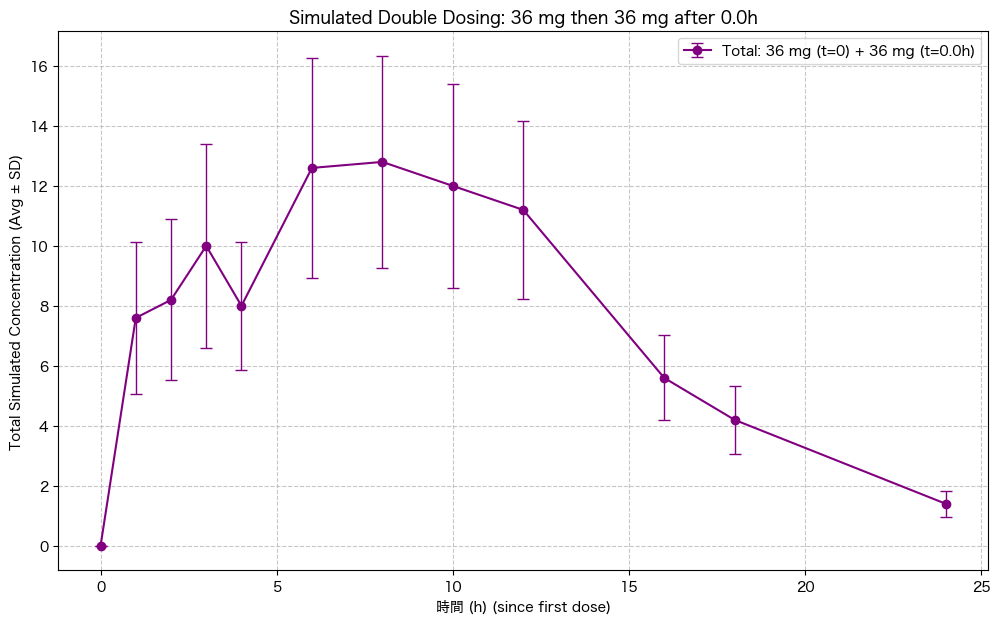

In [25]:
plot_double_dose_simulation(df_polars, "36 mg", "36 mg", 0.0)

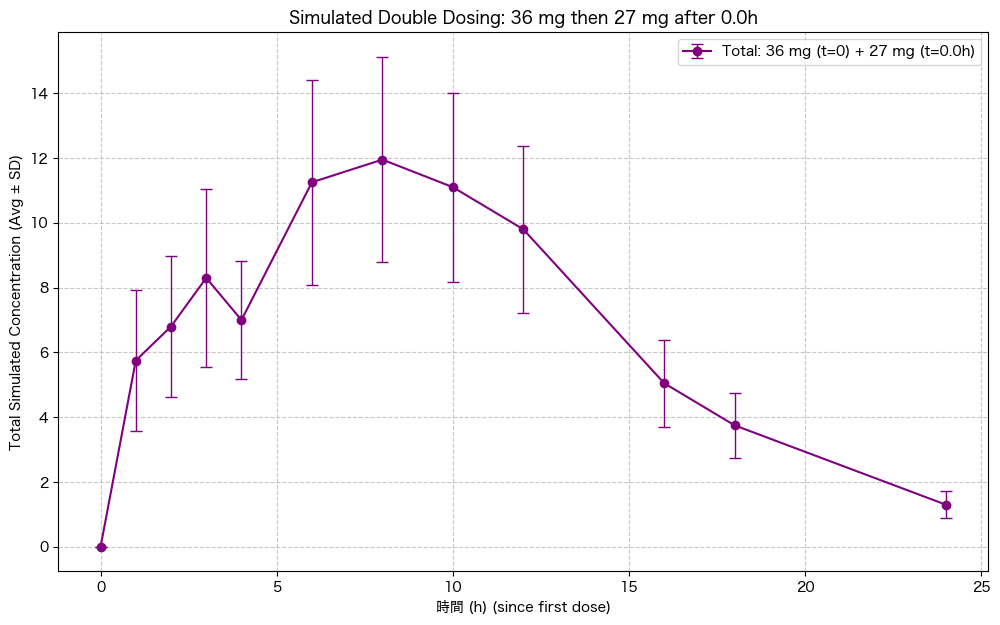

In [26]:
plot_double_dose_simulation(df_polars, "36 mg", "27 mg", 0.0)

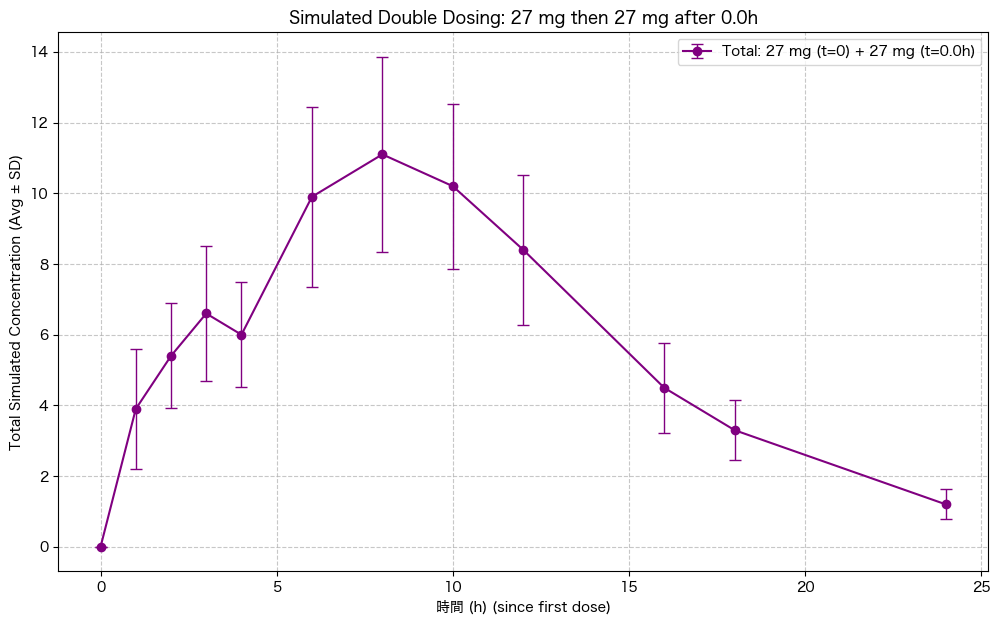

In [27]:
plot_double_dose_simulation(df_polars, "27 mg", "27 mg", 0.0)

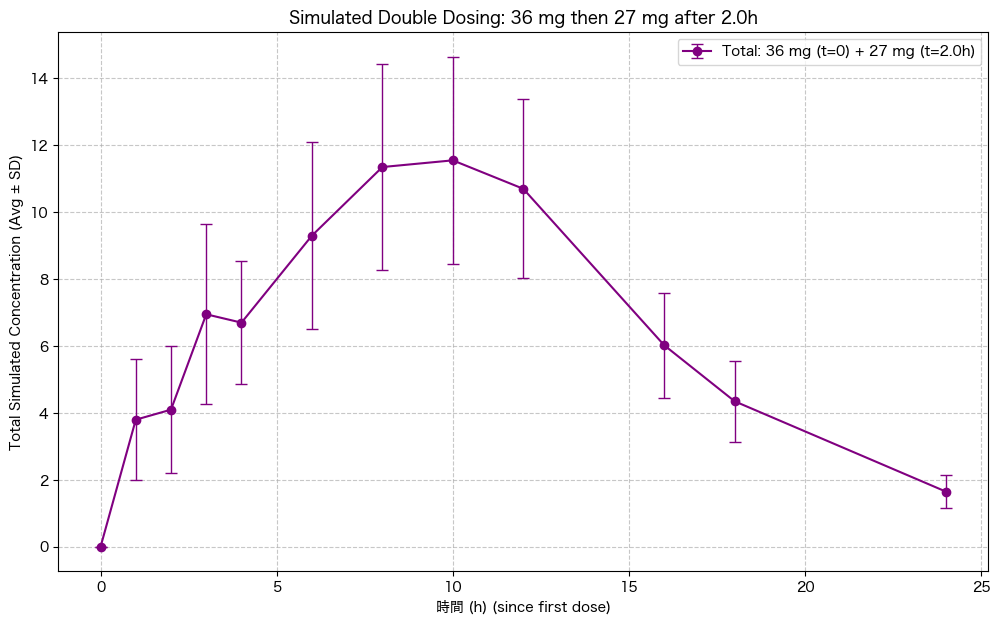

In [28]:
plot_double_dose_simulation(df_polars, "36 mg", "27 mg", 2.0)

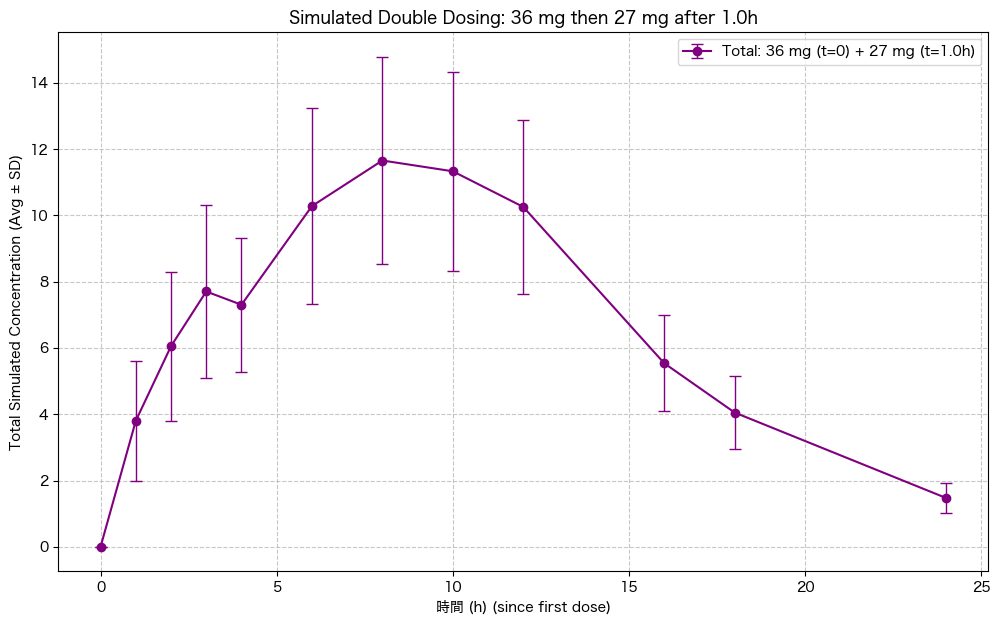

In [29]:
plot_double_dose_simulation(df_polars, "36 mg", "27 mg", 1.0)